In [1]:
import torch
import psutil
import matplotlib.pyplot as plt
import pickle
from Questionnaire import Questionnaire
from Vocabulary import Vocabulary
from QuestionsParser import QuestionsParser

import settings
from trainer_helpers import train_n_gram, find_hyperparams

In [2]:
if settings.USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cpu


In [3]:
with open(settings.test_n_gram_data_generator_path, 'rb') as f:
    data_generator = pickle.load(f)

In [37]:
unformated_training_data = [
('mother', 'female'), ('mother', 'woman'),
('woman', 'she'), ('woman', 'female'), ('female', 'she'), ('she', 'female'), ('she', 'woman'),
('father', 'he'), ('father', 'male'), ('man', 'he'), ('man', 'male'),
('male', 'he'), ('he', 'male'),
]

In [38]:
corpus = [['mother', 'she', 'woman', 'female', 
'father', 'he', 'man', 'male']]
vocabulary = Vocabulary(corpus)

In [39]:
training_data = []
for X, y in unformated_training_data:
    X_idx = vocabulary.get_idx(X)
    y_idx = vocabulary.get_idx(y)
    sample = (X_idx, y_idx)
    training_data.append(sample)

In [40]:
questions_parser = QuestionsParser(vocabulary, settings.test_questions_filename, settings.test_meta_lines_indices)

In [41]:
lr = 10**(-5)
gamma = 0.000001
step_size = 30
model_path = 'models_weights/n_gram'
train_losses, val_accuracies, model = train_n_gram(training_data, questions_parser, settings.embedding_dim, device, lr,
gamma, step_size, model_path)

0.3333333333333333
epoch: 0
loss: 0
epoch: 1
loss: 0
epoch: 2
loss: 0
epoch: 3
loss: 0
epoch: 4
loss: 0
0.3333333333333333
epoch: 5
loss: 0
epoch: 6
loss: 0
epoch: 7
loss: 0
epoch: 8
loss: 0
epoch: 9
loss: 0
0.3333333333333333
epoch: 10
loss: 0
epoch: 11
loss: 0
epoch: 12
loss: 0
epoch: 13
loss: 0
epoch: 14
loss: 0
0.3333333333333333
epoch: 15
loss: 0
epoch: 16
loss: 0
epoch: 17
loss: 0
epoch: 18
loss: 0
epoch: 19
loss: 0
0.3333333333333333
epoch: 20
loss: 0
epoch: 21
loss: 0
epoch: 22
loss: 0
epoch: 23
loss: 0
epoch: 24
loss: 0


In [42]:
import numpy as np
mother_idx = vocabulary.get_idx('mother')
mother_idx = torch.tensor([mother_idx])
print(mother_idx)
log_prob = model(mother_idx)
print(log_prob)
answer_idx = log_prob.argmax().item()
print(answer_idx)
answer = vocabulary.get_word(answer_idx)
print(answer)

tensor([0])
tensor([[-1.8832, -2.2386, -2.1264, -2.1294, -2.3075, -2.0510, -2.3495, -1.7171]],
       grad_fn=<LogSoftmaxBackward>)
7
male


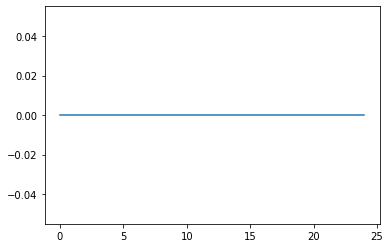

In [19]:
plt.plot(train_losses)
plt.show()

In [15]:
questionnaire = Questionnaire(questions_parser, model)

In [16]:
a = questionnaire.get_analogy('mother', 'she', 'he')
print(a)

(['parent', 'man', 'she', 'male', 'female'], tensor([-0.0530,  0.6438, -0.0192,  0.1572, -0.1545, -0.8369,  0.6603,  0.5158,
        -0.8107,  0.7013]))


In [18]:
acc = questionnaire.check_val_accuracy()
print(acc)

0.0


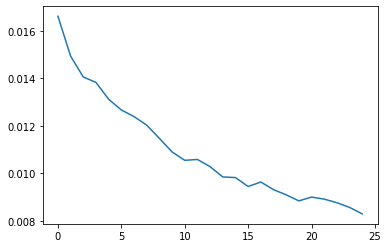

In [15]:
plt.plot(train_losses)
plt.show()

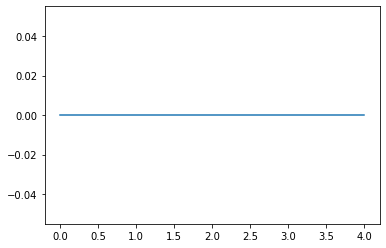

In [16]:
plt.plot(val_accuracies)
plt.show()

In [8]:
lr = 10**(-1.5)
gamma = 10**(-0.05)
step_size = 10
model_path = 'models_weights/n_gram'
train_losses, val_accuracies, model = train_n_gram(data_generator, questions_parser, settings.embedding_dim, device, lr,
gamma, step_size, model_path)

text dataset has setup
{'total': 8589934592, 'available': 3317960704, 'percent': 61.4, 'used': 4789071872, 'free': 293085184, 'active': 3022725120, 'inactive': 3001651200, 'wired': 1766346752}
dataloader has setup
{'total': 8589934592, 'available': 3317465088, 'percent': 61.4, 'used': 4789211136, 'free': 292560896, 'active': 3022856192, 'inactive': 3001651200, 'wired': 1766354944}
model has setup
{'total': 8589934592, 'available': 3317465088, 'percent': 61.4, 'used': 4789211136, 'free': 292560896, 'active': 3022856192, 'inactive': 3001651200, 'wired': 1766354944}
optimizer has setup
{'total': 8589934592, 'available': 3317465088, 'percent': 61.4, 'used': 4789211136, 'free': 292560896, 'active': 3022856192, 'inactive': 3001651200, 'wired': 1766354944}
scheduler has setup
{'total': 8589934592, 'available': 3317465088, 'percent': 61.4, 'used': 4789211136, 'free': 292560896, 'active': 3022856192, 'inactive': 3001651200, 'wired': 1766354944}


RuntimeError: index out of range: Tried to access index 100391 out of table with 100240 rows. at /Users/distiller/project/conda/conda-bld/pytorch_1565272526878/work/aten/src/TH/generic/THTensorEvenMoreMath.cpp:237